In [1]:
#‘ensemble’ is group
#Random Forest is considered to be a panacea of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!
#K-Fold is validation technique in which we split the data into k-subsets and the holdout method is repeated k-times where each of the k subsets are used as test set and other k-1 subsets are used for the training purpose. Then the average error from all these k trials is computed , which is more reliable as compared to standard handout method.
#The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm or configuration on a dataset.A single run of the k-fold cross-validation procedure may result in a noisy estimate of model performance. Different splits of the data may result in very different results.Repeated k-fold cross-validation provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. 
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pandas as pd

In [4]:
# import some data to play with
Fraud_check = pd.read_csv('Fraud_check.csv')
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
Fraud_check_df = Fraud_check.rename(columns={'Marital.Status': 'MaritalStatus', 'Taxable.Income': 'TaxableIncome','City.Population': 'CityPopulation', 'Work.Experience': 'WorkExperience'})
Fraud_check_df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
Fraud_check_df['Undergrad'] = Fraud_check_df['Undergrad'].map({'YES':1 ,'NO':0})
Fraud_check_df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES
596,1,Divorced,69967,55369,2,YES
597,0,Divorced,47334,154058,0,YES
598,1,Married,98592,180083,17,NO


In [7]:
Fraud_check_df['Urban'] = Fraud_check_df['Urban'].map({'YES':1 ,'NO':0})
Fraud_check_df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [8]:
from sklearn import preprocessing

In [9]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check_df['MaritalStatus']= label_encoder.fit_transform(Fraud_check_df['MaritalStatus']) 
Fraud_check_df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [10]:
Fraud_check_df['Fraudulent'] = Fraud_check_df['TaxableIncome'].apply(lambda x: 1 if x <= 30000 else 0)
Fraud_check_df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Fraudulent
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [11]:
array = Fraud_check_df.values
array

array([[    0,     2, 68833, ...,    10,     1,     0],
       [    1,     0, 33700, ...,    18,     1,     0],
       [    0,     1, 36925, ...,    30,     1,     0],
       ...,
       [    0,     0, 47334, ...,     0,     1,     0],
       [    1,     1, 98592, ...,    17,     0,     0],
       [    0,     0, 96519, ...,    16,     0,     0]], dtype=int64)

In [12]:
X = array[:,0:6]
Y = array[:,6]
X

array([[     0,      2,  68833,  50047,     10,      1],
       [     1,      0,  33700, 134075,     18,      1],
       [     0,      1,  36925, 160205,     30,      1],
       ...,
       [     0,      0,  47334, 154058,      0,      1],
       [     1,      1,  98592, 180083,     17,      0],
       [     0,      0,  96519, 158137,     16,      0]], dtype=int64)

In [13]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9983333333333334


In [15]:
model.fit(X,Y)

RandomForestClassifier(max_features=3)

In [16]:
Fraud_check_df.columns

Index(['Undergrad', 'MaritalStatus', 'TaxableIncome', 'CityPopulation',
       'WorkExperience', 'Urban', 'Fraudulent'],
      dtype='object')

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

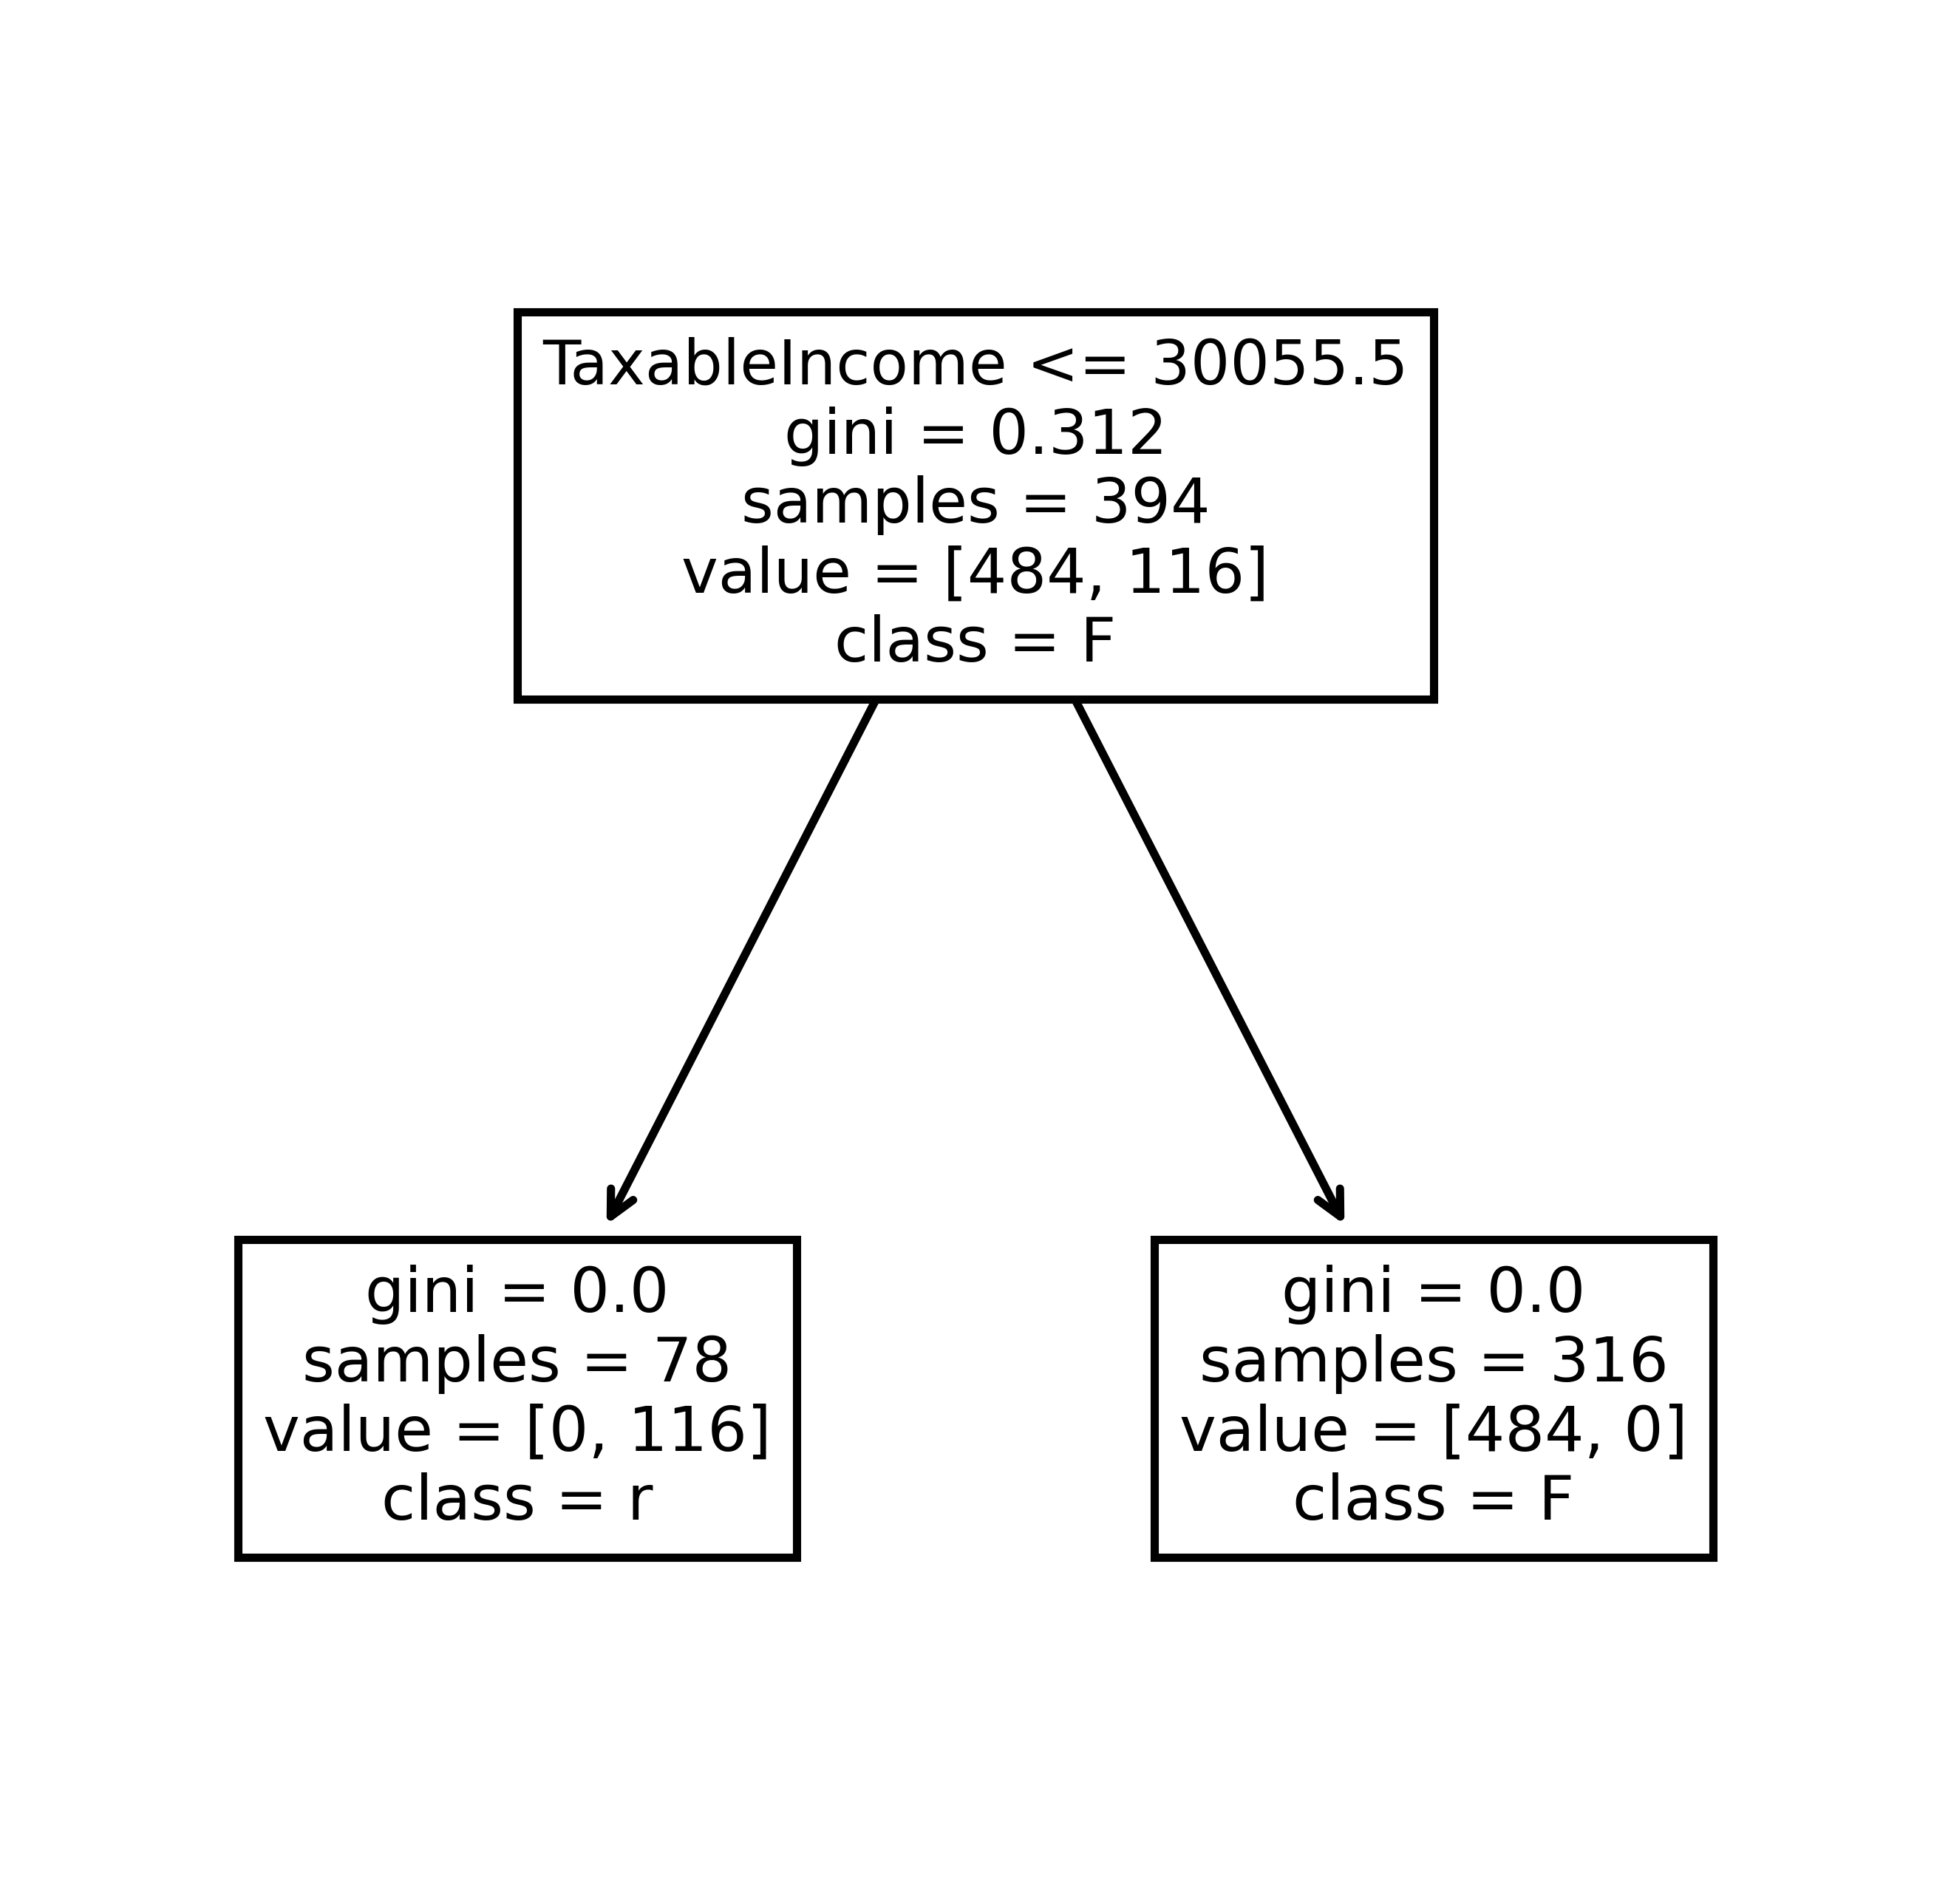

In [18]:
#Plotting individual plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = ['Undergrad', 'MaritalStatus', 'TaxableIncome', 'CityPopulation','WorkExperience', 'Urban'],
               class_names='Fraudulent');
fig.savefig('model_individualtree.png')

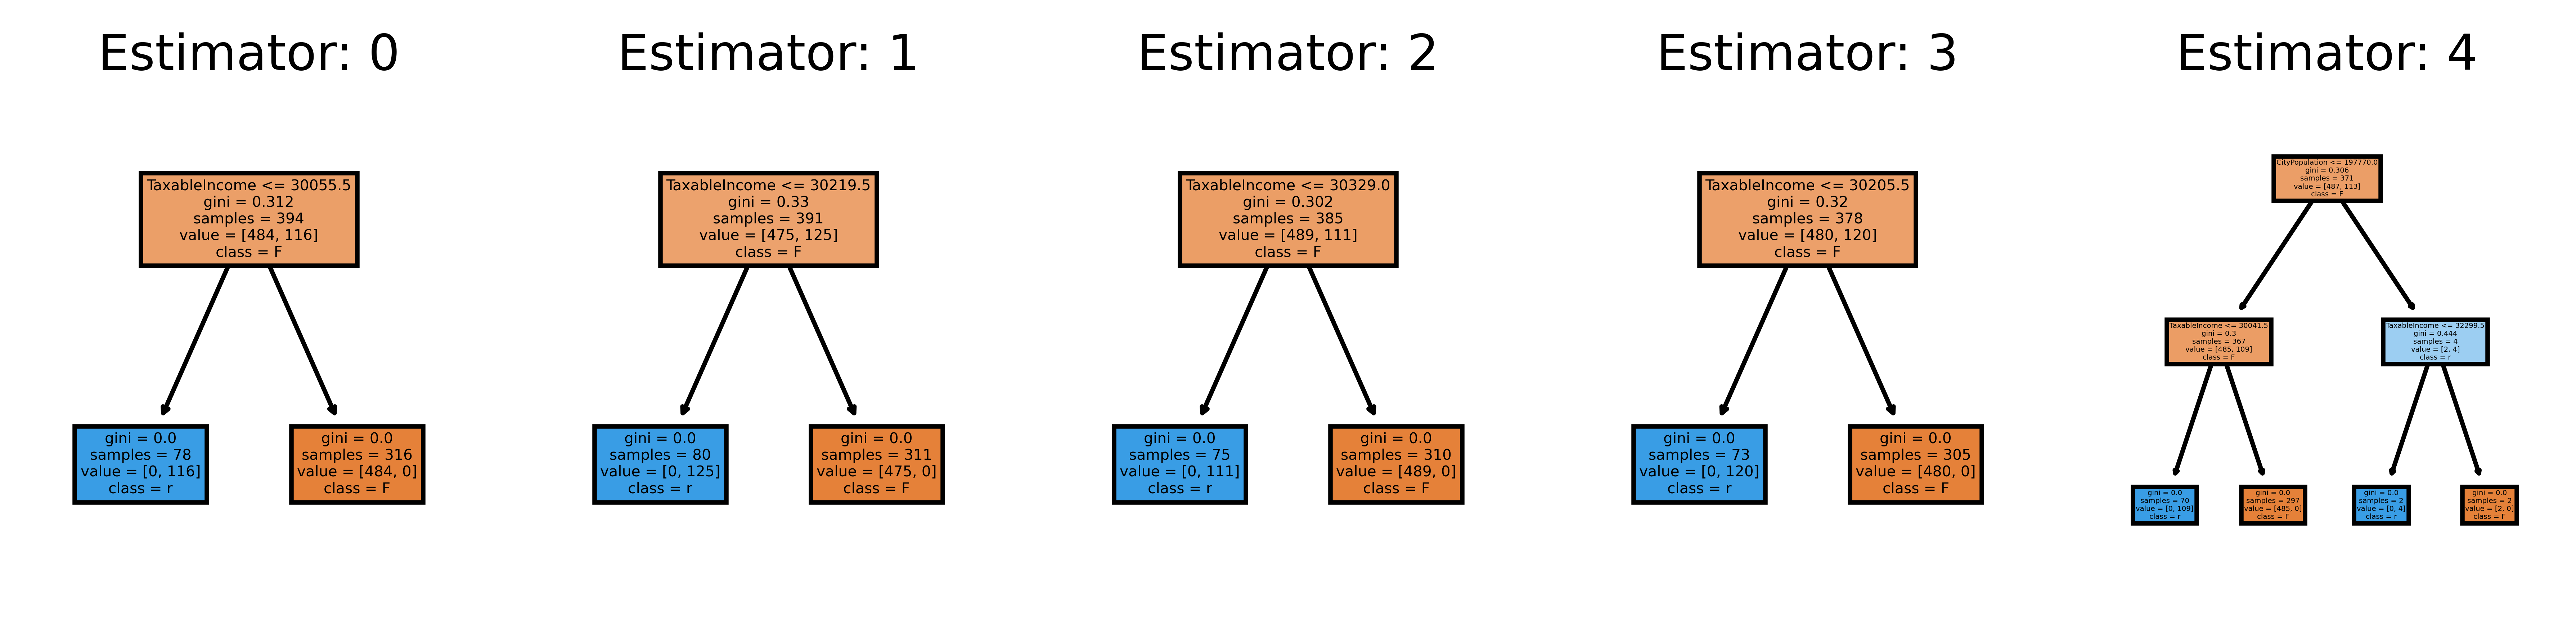

In [19]:
#plotting first 5 trees 
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],
                   feature_names = ['Undergrad', 'MaritalStatus', 'TaxableIncome', 'CityPopulation','WorkExperience', 'Urban'],
                   class_names='Fraudulent',
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('model_5trees.png')